<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/Marketing_Performing_Multiclass_Classification_and_Evaluating_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is provided with data on the annual spend amount of each of the 20,000 customers of a major retail company. The marketing team of the company used different channels to sell their goods and has segregated customers based on the purchases made using different channels, which are as follows: 0-Retail, 1-Road Show, 2-Social Media, and 3-Televison. As a data scientist, we are tasked with building a machine learning model that will be able to predict the most effective channel that can be used to target a customer based on the annual spend on the following seven products (features) sold by the company: fresh produce, milk, grocery, frozen products, detergents, paper, and delicatessen.

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data= pd.read_csv(r'/content/drive/MyDrive/data/MarketingData.csv')
data.head(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
0,6623.613537,5513.093240,6019.057354,5669.568008,5898.660607,5179.234947,2
1,5642.542497,5829.866565,3960.339943,4270.020548,3498.818262,4327.423268,2
2,5292.078175,6634.370556,4444.335138,4888.286021,3265.391352,4887.560190,2
3,5595.227928,4754.860698,2977.856511,3462.490957,3609.264559,4268.641413,0
4,5126.693267,6009.649079,3811.569943,4744.115976,3829.516831,5097.491872,2


In [5]:
data.shape

(20000, 7)

In [6]:
data.isnull().values.any()

False

In [7]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,5853.350191,5267.873868,4873.362341,4899.477763,4786.331781,5613.672184,1.499350
std,1128.370297,1177.563192,1265.579790,1220.923393,1154.682284,1343.743103,1.118464
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,5155.249455,4438.167387,3983.317183,4071.997222,3877.943500,4705.582182,0.000000
50%,5988.720207,5337.741327,4828.100401,5048.099489,4857.070488,5425.888761,1.000000
75%,6573.895741,6081.755179,5784.992859,5684.876863,5602.146034,6574.281056,3.000000
max,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000


In [9]:
# Check the target variable, Channel, for the number of transactions for each of the channels.
data['Channel'].value_counts()

Channel
0    5007
3    5002
1    5001
2    4990
Name: count, dtype: int64

In [10]:
# Define the target, X, and y
target = 'Channel'
X = data.drop(['Channel'],axis=1)
y=data[target]

In [11]:
# Split the train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X.values,y,test_size=0.20, random_state=123, stratify=y)

In [12]:
clf_random = RandomForestClassifier(n_estimators=20, max_depth=None,
     min_samples_split=7, random_state=0)
clf_random.fit(X_train,y_train)

RandomForestClassifier(min_samples_split=7, n_estimators=20, random_state=0)

In [13]:
y_pred=clf_random.predict(X_test)

In [14]:
precision_recall_fscore_support(y_test, y_pred, average='macro')

(0.8888143115382328, 0.8885103588795973, 0.888619538273321, None)

In [15]:
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.8885, 0.8885, 0.8885, None)

In [16]:
target_names = ["Retail","RoadShow","SocialMedia","Televison"]
print(classification_report(y_test, y_pred,target_names=target_names))


              precision    recall  f1-score   support

      Retail       0.90      0.90      0.90      1001
    RoadShow       0.86      0.86      0.86      1000
 SocialMedia       0.93      0.91      0.92       998
   Televison       0.87      0.89      0.88      1001

    accuracy                           0.89      4000
   macro avg       0.89      0.89      0.89      4000
weighted avg       0.89      0.89      0.89      4000



- Precision: This measures the accuracy of positive predictions. It's defined as the ratio of true positive predictions to the total number of positive predictions (true positives + false positives). A higher precision means fewer false positives.
  + Retail: 90% of items classified as Retail were correct.
  + RoadShow: 86% of items classified as RoadShow were correct.
  + SocialMedia: 93% of items classified as SocialMedia were correct.
  + Television: 87% of items classified as Television were correct.
- Recall: This measures the ability of a model to find all relevant cases (true positives) within a dataset. It's defined as the ratio of true positives to the actual number of positives in the dataset (true positives + false negatives). A higher recall means fewer false negatives.
Retail: 90% of all actual Retail items were correctly identified.
RoadShow: 86% of all actual RoadShow items were correctly identified.
SocialMedia: 91% of all actual SocialMedia items were correctly identified.
Television: 89% of all actual Television items were correctly identified.
- F1-Score: This is the harmonic mean of precision and recall, providing a single score that balances both the precision and the recall. It's particularly useful when the class distribution is uneven. An F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
  + Retail: 0.90
  + RoadShow: 0.86
  + SocialMedia: 0.92
  + Television: 0.88
- Support: This simply refers to the number of actual occurrences of the class in the specified dataset.
  + Retail: 1001 cases
  + RoadShow: 1000 cases
  + SocialMedia: 998 cases
  + Television: 1001 cases
- Overall Metrics:
  + Accuracy: 89% of all classifications across categories were correct.
  + Macro Average: Average of the metric scores for each class, treating all classes equally (0.89 for precision, recall, and f1-score).
  + Weighted Average: Average of the metric scores for each class weighted by the support (number of actual occurrences) for each class (0.89 for precision, recall, and f1-score).

Overall, these metrics suggest that the model performs relatively well, with balanced precision and recall across different classes. SocialMedia has the highest performance in terms of both precision and f1-score, suggesting it might be the easiest class for the model to predict accurately.

In [17]:
cm = confusion_matrix(y_test, y_pred)

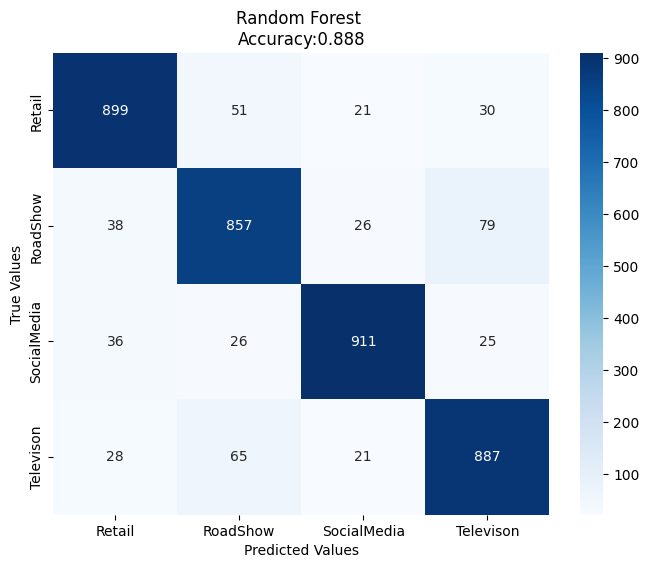

In [18]:
cm_df = pd.DataFrame(cm,
                     index = target_names,
                     columns = target_names)
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,fmt='g',cmap='Blues')
plt.title('Random Forest \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()
